# Section 1
Behavariol Data of ASD childre


# Section2

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Behavior Analysis of Autism.csv')

# Summary statistics for Age_Mons
age_mons_stats = df['Age_Mons'].describe()
print("Summary Statistics for Age_Mons:")
print(age_mons_stats)

# Summary statistics for Ethnicity
ethnicity_counts = df['Ethnicity'].value_counts()
print("\nCounts for Ethnicity:")
print(ethnicity_counts)

Summary Statistics for Age_Mons:
count    1188.000000
mean       27.801347
std         7.963645
min        12.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        36.000000
Name: Age_Mons, dtype: float64

Counts for Ethnicity:
Ethnicity
White European    381
asian             333
middle eastern    203
south asian        70
black              61
Hispanic           45
Others             38
Latino             36
Pacifica           10
mixed               8
Native Indian       3
Name: count, dtype: int64


C:\Users\smart view\AppData\Local\Temp\ipykernel_3572\1641188146.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Ethnicity', y='Age_Mons', jitter=True, palette='Set2')


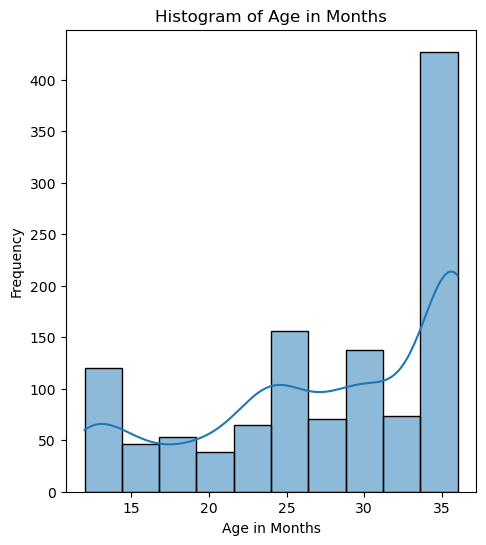

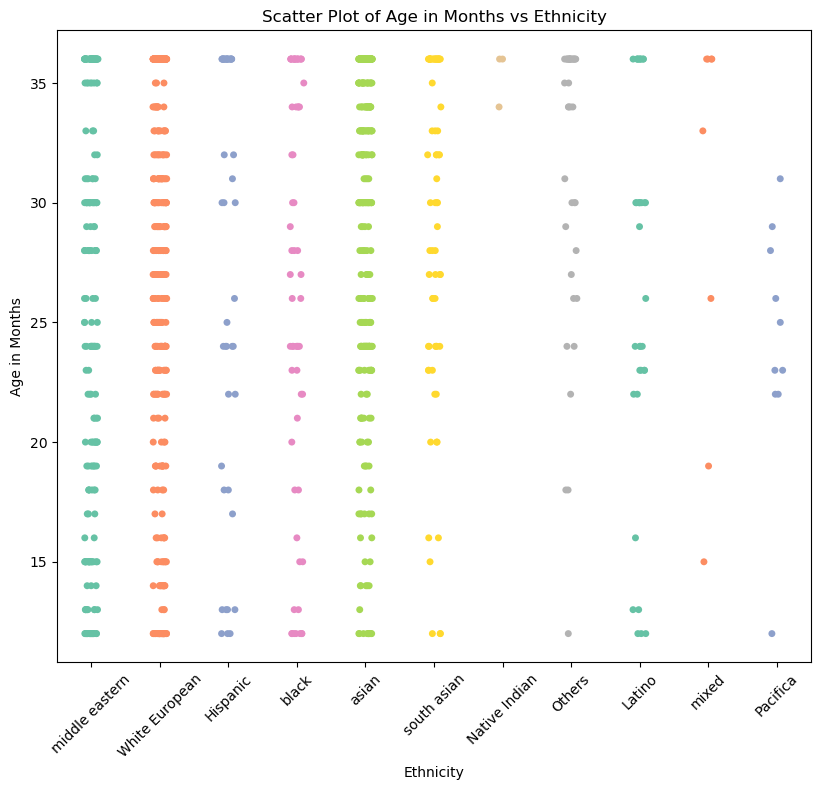

<Figure size 640x480 with 0 Axes>

In [16]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the figure for plotting
plt.figure(figsize=(18, 6))

# Histogram for Age_Mons
plt.subplot(1, 3, 1)
sns.histplot(df['Age_Mons'], bins=10, kde=True)
plt.title('Histogram of Age in Months')
plt.xlabel('Age in Months')
plt.ylabel('Frequency')

# Set up the figure for plotting
plt.figure(figsize=(16, 8))

# Scatter plot for Age_Mons vs Ethnicity
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='Ethnicity', y='Age_Mons', jitter=True, palette='Set2')
plt.title('Scatter Plot of Age in Months vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Age in Months')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

# Show the plots
plt.tight_layout()
plt.show()


In [17]:
#Missing Value Handling
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values count for each column
print("Missing values in each feature:")
print(missing_values[missing_values > 0])

# Fill missing values with mode for each column that has missing values
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  
# Calculate the total sum of missing values in the dataset
total_missing_values = df.isnull().sum().sum()

# Print the total sum of missing values
print("Total number of missing values in the dataset:", total_missing_values)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after[missing_values_after > 0])

Missing values in each feature:
Blood group    1
dtype: int64
Total number of missing values in the dataset: 0

Missing values after filling:
Series([], dtype: int64)


In [18]:
# Drop the Blood_group column
df = df.drop(columns=['Blood group'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the transformed DataFrame
print(df_encoded.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  Ethnicity_middle eastern  \
0        1   0   0   0   0   0   0   1   1   0  ...                      True   
1        2   1   1   0   0   0   1   1   0   0  ...                     False   
2        3   1   0   0   0   0   0   1   1   0  ...                      True   
3        4   1   1   1   1   1   1   1   1   1  ...                     False   
4        5   1   1   0   1   1   1   1   1   1  ...                     False   

   Ethnicity_mixed  Ethnicity_south asian  Jaundice_yes  \
0            False                  False          True   
1            False                  False          True   
2            False                  False          True   
3            False                  False         False   
4            False                  False         False   

   Family_mem_with_ASD_yes  Who completed the test_Health care professional  \
0                    False                                            False   


# Section 3 and 4

Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[104   0]
 [  0 253]]


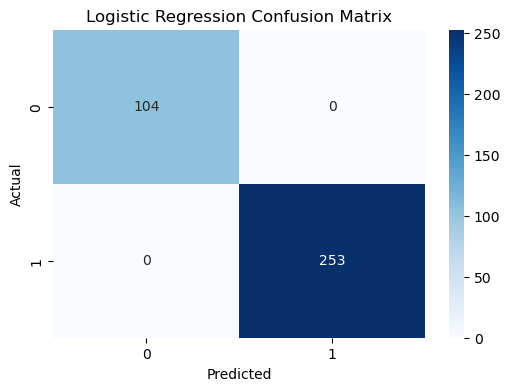

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define features and target variable
X = df_encoded.drop(columns=['Class/ASD_Yes'])  # Features
y = df_encoded['Class/ASD_Yes']  # Target variable (assuming Class/ASD is encoded to 1 and 0)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Print evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[104   0]
 [  0 253]]


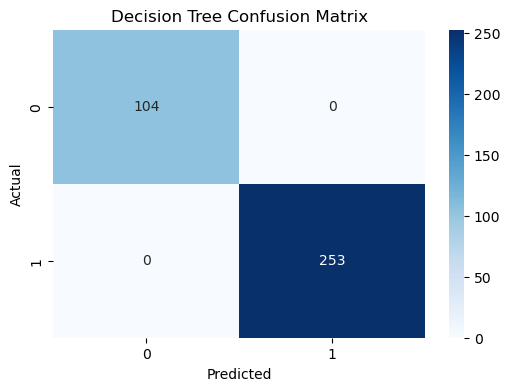

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Behavior Analysis of Autism.csv')

# Check for missing values and fill with mode if necessary
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Drop the Blood_group column
df = df.drop(columns=['Blood group'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['Class/ASD_Yes'])  # Features
y = df_encoded['Class/ASD_Yes']  # Target variable (assuming Class/ASD is encoded to 1 and 0)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Print evaluation metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[104   0]
 [  0 253]]


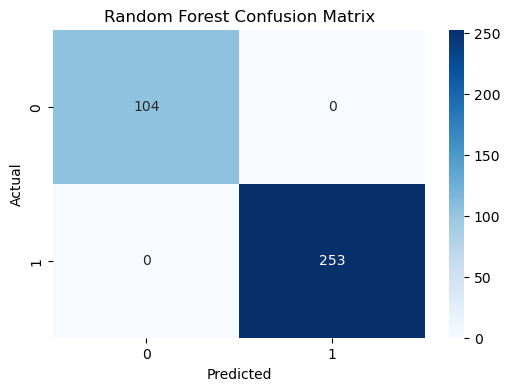

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Print evaluation metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\smart view\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


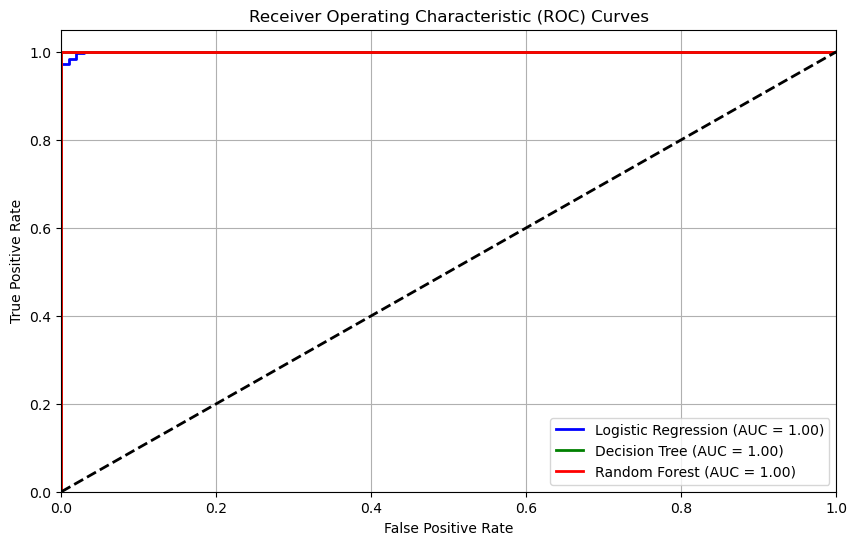

In [25]:
# ROC-CURVE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Define features and target variable
X = df_encoded.drop(columns=['Class/ASD_Yes'])  # Features
y = df_encoded['Class/ASD_Yes']  # Target variable (assuming Class/ASD is encoded to 1 and 0)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Get predicted probabilities for ROC curve
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Section 5

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv('Behavior Analysis of Autism.csv')

# Check for missing values and fill with mode if necessary
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Drop the Blood_group column
df = df.drop(columns=['Blood group'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['Class/ASD_Yes'])  # Features
y = df_encoded['Class/ASD_Yes']  # Target variable (assuming Class/ASD is encoded to 1 and 0)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning for Logistic Regression
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver that supports l1 penalty
}

logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# Best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression:", logistic_grid.best_params_)
print("Best cross-validation score for Logistic Regression:", logistic_grid.best_score_)

# Hyperparameter tuning for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],  # Quality of split measure
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node
}

dt_model = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best parameters and score for Decision Tree
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best cross-validation score for Decision Tree:", dt_grid.best_score_)

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Quality of split measure
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid.best_score_)


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 1.0
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 1.0
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 1.0
